In [1]:
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from sklearn import tree
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_combined = pd.read_csv("../CombinedBooksRandomized.csv")
df_combined.head()

,Title,Author,Author Average Rating,Author Votes,Review Count,Distinct Works,Year,Rating,Raters,Genres
0,The Left Hand of Darkness (Paperback),Ursula K. Le Guin,4.07,1258005,85585,753,1969,4.09,155037,"Science Fiction,Fiction,Fantasy,Classics,Scien..."
1,Wish You Were Here (Hardcover),Jodi Picoult,3.99,4447186,273761,82,2021,3.99,153115,"Fiction,Contemporary,Audiobook,Romance,Adult,A..."
2,If I Had Your Face (Hardcover),Frances Cha,3.76,41079,5356,4,2020,3.76,41078,"Fiction,Contemporary,Literary Fiction,Adult,Fe..."
3,I'll Be Gone in the Dark: One Woman's Obsessiv...,Michelle McNamara,4.12,210117,18190,2,2018,4.12,210038,"Nonfiction,Crime,Audiobook,Mystery,Mystery,His..."
4,1984 (Paperback),George Orwell,4.10,8007938,201434,729,1949,4.19,4034352,"Classics,Fiction,Science Fiction,Science Ficti..."


In [3]:
minRaters=min(df_combined.Raters)
maxRaters=max(df_combined.Raters)
meanRaters=df_combined.Raters.mean()
print('Min Raters :',minRaters)
print('Max Raters :',maxRaters)
print('Mean Raters :',meanRaters)

Min Raters : 41
Max Raters : 8958054
Mean Raters : 316506.9895833333


In [4]:
#rating class column
conditions  = [ df_combined.Rating >= 4, (df_combined.Rating < 4) & (df_combined.Rating> 2), (df_combined.Rating <= 2) ]
choices     = [ "good", 'mediocre', 'bad' ]
df_combined["rating_class"] = np.select(conditions, choices, default="bad")
#rater class column
conditions  = [ df_combined.Raters >= 25000, (df_combined.Raters < 25000) & (df_combined.Raters> 1000), (df_combined.Raters <= 1000) ]
choices     = [ "large", 'medium', 'small' ]
df_combined["raters_class"] = np.select(conditions, choices, default="small")

df_combined['worth_reading']=np.where(((df_combined.rating_class == "mediocre") & (df_combined.raters_class == "large"))|((df_combined.rating_class == "good") & ((df_combined['raters_class'] == "large")|(df_combined["raters_class"] =="medium"))) ,'yes','no')

In [5]:
df_combined.head()

,Title,Author,Author Average Rating,Author Votes,Review Count,Distinct Works,Year,Rating,Raters,Genres,rating_class,raters_class,worth_reading
0,The Left Hand of Darkness (Paperback),Ursula K. Le Guin,4.07,1258005,85585,753,1969,4.09,155037,"Science Fiction,Fiction,Fantasy,Classics,Scien...",good,large,yes
1,Wish You Were Here (Hardcover),Jodi Picoult,3.99,4447186,273761,82,2021,3.99,153115,"Fiction,Contemporary,Audiobook,Romance,Adult,A...",mediocre,large,yes
2,If I Had Your Face (Hardcover),Frances Cha,3.76,41079,5356,4,2020,3.76,41078,"Fiction,Contemporary,Literary Fiction,Adult,Fe...",mediocre,large,yes
3,I'll Be Gone in the Dark: One Woman's Obsessiv...,Michelle McNamara,4.12,210117,18190,2,2018,4.12,210038,"Nonfiction,Crime,Audiobook,Mystery,Mystery,His...",good,large,yes
4,1984 (Paperback),George Orwell,4.10,8007938,201434,729,1949,4.19,4034352,"Classics,Fiction,Science Fiction,Science Ficti...",good,large,yes


In [6]:
#split dataset in features and target variable
feature_cols=["Author Average Rating", "Author Votes", "Review Count", "Distinct Works", "Year"]
X = df_combined[feature_cols] # Features
y = df_combined['worth_reading'] # Target variable

print(X)
print(y)

      Author Average Rating  Author Votes  Review Count  Distinct Works  Year
0                      4.07       1258005         85585             753  1969
1                      3.99       4447186        273761              82  2021
2                      3.76         41079          5356               4  2020
3                      4.12        210117         18190               2  2018
4                      4.10       8007938        201434             729  1949
...                     ...           ...           ...             ...   ...
1723                   4.23        353862         48530              14  2017
1724                   3.87         15137          1503              60  2012
1725                   3.88       1385551        106047              51  2011
1726                   4.28        448442         25874              15  1943
1727                   3.58          6388           851               7  2005

[1728 rows x 5 columns]
0       yes
1       yes
2       yes
3  

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

tree_model = tree.DecisionTreeClassifier( random_state=42)




In [8]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    "max_depth": list(range(2, 100)),
    'criterion' :['gini', 'entropy'],
    "max_features" : [5, 10, 10, 50, 100],
    "min_samples_split" : [2, 5, 10, 15]
}

grid_search = GridSearchCV(estimator=tree_model, cv = 3, param_grid= parameter_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...],
                         'max_features': [5, 10, 10, 50, 100],
                         'min_samples_split': [2, 5, 10, 15]})

In [17]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002332,0.000471,0.001001,6.836514e-07,gini,2,5,2,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.914508,0.909326,0.906494,0.910109,0.003318,3876
1,0.003665,0.000475,0.002004,4.979595e-06,gini,2,5,5,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.914508,0.909326,0.906494,0.910109,0.003318,3876
2,0.003666,0.000472,0.001667,4.710895e-04,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.914508,0.909326,0.906494,0.910109,0.003318,3876
3,0.003667,0.000472,0.002001,3.164976e-06,gini,2,5,15,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.914508,0.909326,0.906494,0.910109,0.003318,3876
4,0.002323,0.000479,0.002009,1.569342e-05,gini,2,10,2,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.914508,0.909326,0.906494,0.910109,0.003318,3876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,0.003669,0.000470,0.001000,2.973602e-07,entropy,99,50,15,"{'criterion': 'entropy', 'max_depth': 99, 'max...",0.886010,0.911917,0.935065,0.910997,0.020037,2976
3916,0.003664,0.000475,0.001000,2.973602e-07,entropy,99,100,2,"{'criterion': 'entropy', 'max_depth': 99, 'max...",0.888601,0.906736,0.940260,0.911866,0.021399,2541
3917,0.003029,0.000044,0.001305,4.960363e-04,entropy,99,100,5,"{'criterion': 'entropy', 'max_depth': 99, 'max...",0.898964,0.917098,0.924675,0.913579,0.010788,1216
3918,0.002766,0.000535,0.000908,1.170559e-04,entropy,99,100,10,"{'criterion': 'entropy', 'max_depth': 99, 'max...",0.898964,0.917098,0.914286,0.910116,0.007969,3436


In [18]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=5,
                       random_state=42)

From the best parameters found through the gridsearch, we tweak some more parameters to avoid overfitting.

In [19]:
tree_class = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=5,
                       random_state=42)
tree_class.fit(X_train, y_train)
predictions = tree_class.predict(X_test)
predictions

from sklearn.metrics import accuracy_score, confusion_matrix

print("Trained acc: ", accuracy_score(y_train, tree_class.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, predictions))
print("Confusion matrix train: ", "\n", confusion_matrix(y_train, tree_class.predict(X_train)))
print("Confusion matrix test: ", "\n",confusion_matrix(y_test, predictions))


Trained acc:  0.9688850475367329
Test accuracy: 0.9457092819614711
Confusion matrix train:  
 [[314  26]
 [ 10 807]]
Confusion matrix test:  
 [[169  16]
 [ 15 371]]


In [12]:
tree_class.feature_importances_

array([0.03976948, 0.69859175, 0.12857599, 0.08567816, 0.04738462])

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_train, tree_class.predict(X_train)))
print("---------------------------------------------------------")
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          no       0.97      0.92      0.95       340
         yes       0.97      0.99      0.98       817

    accuracy                           0.97      1157
   macro avg       0.97      0.96      0.96      1157
weighted avg       0.97      0.97      0.97      1157

---------------------------------------------------------
              precision    recall  f1-score   support

          no       0.92      0.91      0.92       185
         yes       0.96      0.96      0.96       386

    accuracy                           0.95       571
   macro avg       0.94      0.94      0.94       571
weighted avg       0.95      0.95      0.95       571



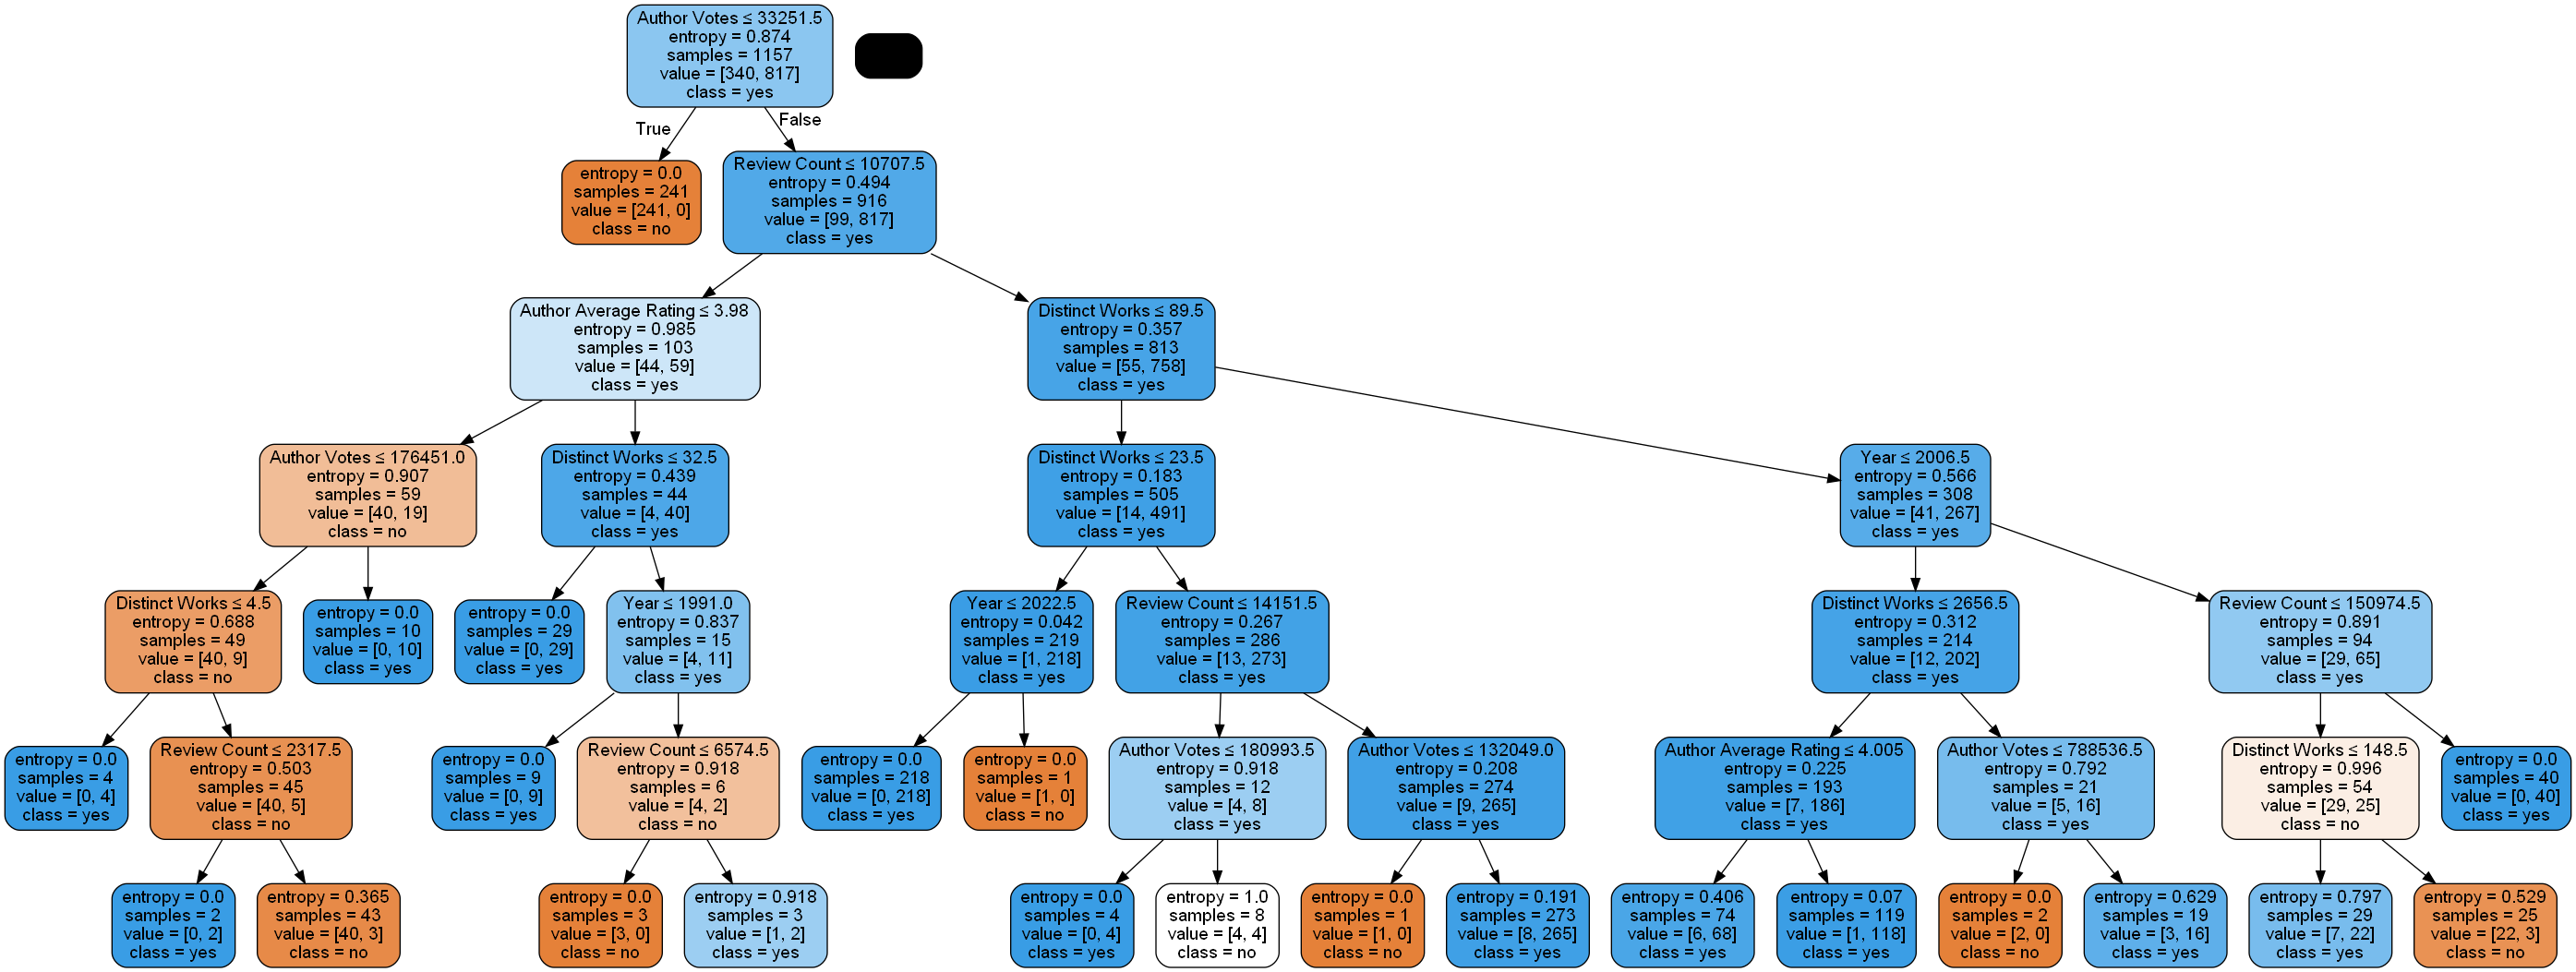

In [16]:
dot_data = StringIO()
export_graphviz(tree_class, out_file=dot_data, 
                     feature_names=X.columns,  
                     class_names=["no", "yes"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('combined_tree2.png')
Image(graph.create_png())